# Data Analysis on Actors/Actresses/Directors

The goal of this data analysis is to suggest people to staff for the movie in regards their success. We reviewed writers, directors, actors, and actresses. This dataset is from 2010-2020. 

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import sqlite3

! pip install -U pandasql

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [170]:
master_df = pd.read_pickle('movie_master_dataset_with_inflation.pkl')
master_df = master_df[master_df['worldwide_gross'] != 0]

In [171]:
##data is from 2010-2020
master_df['release_date'].dt.year.value_counts() 

2011    1729
2014    1648
2010    1645
2015    1605
2013    1585
2016    1532
2012    1476
2017    1181
2018    1179
2019     330
Name: release_date, dtype: int64

In [172]:
#Can use for the quartiles of ROI or Gross
master_df.describe()

,production_budget,inf_adj_production_budget,domestic_gross,worldwide_gross,worldwide_profit,ROI
count,1.391000e+04,1.391000e+04,1.391000e+04,1.391000e+04,1.391000e+04,13910.000000
mean,4.801608e+07,6.062188e+07,6.091838e+07,1.527387e+08,1.047226e+08,2.970612
std,5.703658e+07,7.177147e+07,8.660004e+07,2.399239e+08,1.986994e+08,12.465349
min,2.500000e+04,3.118300e+04,0.000000e+00,2.600000e+01,-2.002376e+08,-0.999974
25%,1.000000e+07,1.256810e+07,6.857096e+06,1.470591e+07,3.680600e+04,0.007812
50%,2.600000e+07,3.349577e+07,3.273230e+07,6.207614e+07,2.916768e+07,1.312788
75%,6.000000e+07,7.619720e+07,7.386451e+07,1.716858e+08,1.165536e+08,3.184026
max,4.106000e+08,5.393109e+08,7.000596e+08,2.048134e+09,1.748134e+09,415.564740


In [173]:
master_df.head()

,release_date,movie,production_budget,inf_adj_production_budget,domestic_gross,worldwide_gross,worldwide_profit,ROI,person_name,movie_role,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,539310899,241063875,1045663875,635063875,1.546673,Johnny Depp,actor,...,False,False,False,False,False,False,False,False,False,False
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,539310899,241063875,1045663875,635063875,1.546673,Geoffrey Rush,actor,...,False,False,False,False,False,False,False,False,False,False
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,539310899,241063875,1045663875,635063875,1.546673,Penélope Cruz,actress,...,False,False,False,False,False,False,False,False,False,False
3,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,539310899,241063875,1045663875,635063875,1.546673,Stuart Beattie,writer,...,False,False,False,False,False,False,False,False,False,False
4,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,539310899,241063875,1045663875,635063875,1.546673,Ted Elliott,writer,...,False,False,False,False,False,False,False,False,False,False


In [174]:
master_df['movie_role'].value_counts().head() ##types of roles. There are almost twice as many actors as actresses

actor       3486
producer    2747
writer      2663
actress     2028
director    1502
Name: movie_role, dtype: int64

<b>Establish new dateframes that orangize by role. Actors, Actresses, Directors, Writers. </b>

In [342]:
actors = master_df.loc[master_df['movie_role'] == "actor"] ##dataframe of actor only

In [176]:
actresses = master_df.loc[master_df['movie_role'] == "actress"] ##dataframe of actresses only

In [177]:
directors = master_df[master_df['movie_role'] == "director"] ##dataframe of directors only

In [396]:
writers = master_df[master_df['movie_role'] == "writer"] ##dataframe of directors only

In [179]:
#hard coded, list of column names for the genres
master_df_genre_col_names = ['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western']

The following two cells get the top 5 genres for actors and directors with good ROI

In [180]:
#list(directors_ROI[master_df_genre_col_names].sum().sort_values(ascending=False).head().index) #same as above but for directors. top 5 genres for directors with ROI between 50% and 300%
#list(actors_ROI[master_df_genre_col_names].sum().sort_values(ascending=False).head().index) ##top 5 genres for actors with ROI between 50% and 300%

## DIRECTORS

### This section outlines the lower half and upper half of directors regarding their movie budgets. Lower half is 10 million to 45 million. Upper half is 45 million+. 



<b>The following cell queries the directors dataframe with budgets (inflation adjusted) between 10 million and 4.5 million. Option to use genre information as well. We did not sort by genre.</b>

In [315]:
##the median budget is 45million in our dataset
#this is the lower half or more conservative options for directors
#option to sort by genre

dq1 = ("""
SELECT person_name, movie, inf_adj_production_budget, ROI
FROM directors
WHERE inf_adj_production_budget BETWEEN 1e7 AND 4.5e7
    --AND Action = 1 --USE THIS TO SORT BY GENRE AS AN OPTION
ORDER BY ROI
""")

directors_q1 = pysqldf(dq1) 
directors_q1

,person_name,movie,inf_adj_production_budget,ROI
0,Vidhu Vinod Chopra,Broken Horses,18710017,-0.999769
1,Timothy Hines,10 Days in a Madhouse,15006421,-0.998782
2,Robbie Pickering,Freaks of Nature,41180555,-0.997850
3,David O. Russell,Accidental Love,32681495,-0.994791
4,David Hayter,Wolves,22622584,-0.994725
...,...,...,...,...
572,Damien Chazelle,La La Land,24586384,20.317558
573,Darren Aronofsky,Black Swan,17603698,24.482055
574,David Gordon Green,Halloween,11736441,24.490067
575,Josh Boone,The Fault in Our Stars,14943019,24.597236


In [316]:
#directors who've had between $10mil-45mil budget and made 3+ movies from 2010-2020.
#This loop sorts by number of movies, and selects the ones that have made 3 or more

three_movies_dq1 = []
for x, y in zip(directors_q1['person_name'].value_counts(), directors_q1['person_name'].value_counts().index.tolist()):
    if x >= 3:
        three_movies_dq1.append(y)
    
three_movies_dq1

['Tim Story',
 'Malcolm D. Lee',
 'David Bowers',
 'David Gordon Green',
 'Craig Gillespie',
 'George Tillman Jr.',
 'Lasse Hallström',
 'Nicholas Stoller',
 'Danny Boyle',
 'Woody Allen',
 'Jonathan Levine',
 'David O. Russell',
 'Jon M. Chu']

<b>Get the ROI of all the directors and get the mean of those ROIs for each individual.</b>

In [317]:
names_dq1 = []
ROI_dq1 = []
for x in three_movies_dq1:
    ROI_dq1_mean = directors_q1[directors_q1['person_name'] == x]['ROI'].mean()
    names_dq1.append(x)
    ROI_dq1.append(ROI_dq1_mean)

    
zipped_name_ROI = sorted(zip(names_dq1, ROI_dq1), reverse=True)
df = pd.DataFrame(zipped_name_ROI, columns=['Director Names', 'Average ROI'])
df.sort_values(by='Average ROI', ascending=False, inplace=True)
df

,Director Names,Average ROI
9,David Gordon Green,8.110978
8,David O. Russell,6.671357
6,Jon M. Chu,6.028101
2,Nicholas Stoller,5.737985
0,Woody Allen,3.472445
4,Lasse Hallström,3.441775
1,Tim Story,3.178820
3,Malcolm D. Lee,2.897087
5,Jonathan Levine,2.700441
10,David Bowers,2.074412


<b>Plot the figures to show directors and their respective avergage ROI.</b>

/var/folders/_j/k535z59d70v7bz31svkq69b40000gn/T/ipykernel_66261/1100109894.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=names, rotation=75);


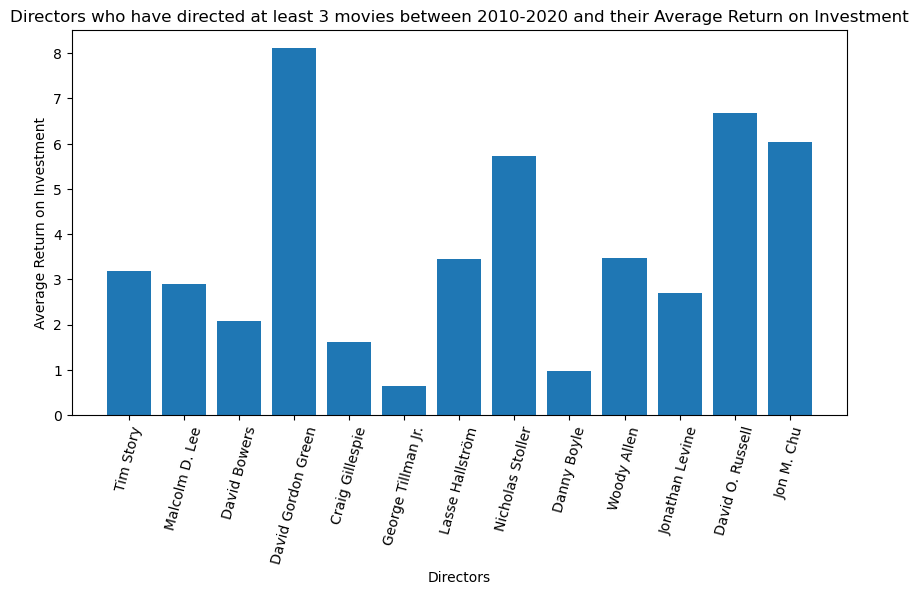

In [211]:
#fig, ax = plt.subplots(figsize=(10,5))
#ax.bar(names,ROI)
#ax.set_title('Directors who have directed at least 3 movies between 2010-2020 and their Average Return on Investment')
#ax.set_xlabel('Directors')
#ax.set_ylabel('Average Return on Investment')
#ax.set_xticklabels(labels=names, rotation=75); 

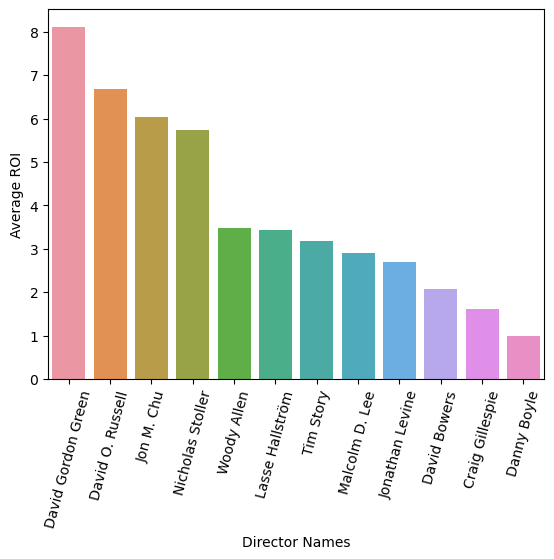

In [318]:
#plt.figure()
sns.barplot(data=df.head(12), x='Director Names', y="Average ROI")
 
# Rotate x-labels
plt.xticks(rotation=75)
plt.show()

<b>The following cell queries the directors dataframe with budgets (inflation adjusted) between 45 million and onward (we used 100 billion.) </b>

In [281]:
q2 = ("""
SELECT person_name, movie, inf_adj_production_budget, ROI
FROM directors
WHERE inf_adj_production_budget BETWEEN 4.5e7 AND 10e9
ORDER BY ROI
""")

directors_q2 = pysqldf(q2) 
directors_q2

,person_name,movie,inf_adj_production_budget,ROI
0,Lawrence Kasanoff,Foodfight!,58169890,-0.998362
1,Xiao Feng,Air Strike,76286869,-0.992057
2,Joel Schumacher,Trespass,45878672,-0.977528
3,F. Gary Gray,Men in Black: International,127458763,-0.971818
4,Mario Van Peebles,USS Indianapolis: Men of Courage,49188864,-0.958405
...,...,...,...,...
610,Eric Guillon,Despicable Me 3,90872915,12.796370
611,Tim Miller,Deadpool,72599862,12.810786
612,Sam Taylor-Johnson,Fifty Shades of Grey,50578471,13.274953
613,Kyle Balda,Minions,92028535,14.680219


In [282]:
#directors who've had greater than $45 million budget and greater than 3+ movies from 2010-2020
three_movies_dq2 = []
for x, y in zip(directors_q2['person_name'].value_counts(), directors_q2['person_name'].value_counts().index.tolist()):
    if x >= 3:
        three_movies_dq2.append(y)
    
three_movies_dq2

['Steven Spielberg',
 'Ridley Scott',
 'Clint Eastwood',
 'Zack Snyder',
 'Ron Howard',
 'Francis Lawrence',
 'Tim Burton',
 'Martin Scorsese',
 'Christopher Nolan',
 'Bryan Singer',
 'Mike Mitchell',
 'Chris Renaud',
 'Paul W.S. Anderson',
 'Jaume Collet-Serra',
 'Brad Peyton',
 'Peter Berg',
 'Antoine Fuqua',
 'Shawn Levy',
 'Christopher Miller',
 'Phil Lord',
 'Guy Ritchie',
 'Frank Coraci',
 'Todd Phillips',
 'Carlos Saldanha',
 'Joe Johnston',
 'Paul Greengrass',
 'David Yates',
 'Genndy Tartakovsky',
 'Peter Jackson',
 'Sean Anders',
 'James Bobin',
 'Denis Villeneuve',
 'Adam McKay',
 'Shane Black',
 'Anthony Russo',
 'Dennis Dugan',
 'Joe Russo',
 'David Fincher',
 'Pierre Coffin',
 'Michael Bay',
 'Rob Marshall',
 'Will Gluck',
 'Dean DeBlois',
 'James Mangold',
 'Daniel Espinosa',
 'Rawson Marshall Thurber',
 'Tom McGrath']

In [296]:
names_dq2 = []
ROI_dq2 = []
for x in three_movies_dq2:
    ROI_dq2_mean = directors_q2[directors_q2['person_name'] == x]['ROI'].mean()
    names_dq2.append(x)
    ROI_dq2.append(ROI_dq2_mean)

    
zipped_name_ROI_2 = sorted(zip(names_dq2, ROI_dq2), reverse=True)
df2 = pd.DataFrame(zipped_name_ROI_2, columns=['Director Names', 'Average ROI'])
df2.sort_values(by='Average ROI', ascending=False, inplace=True)

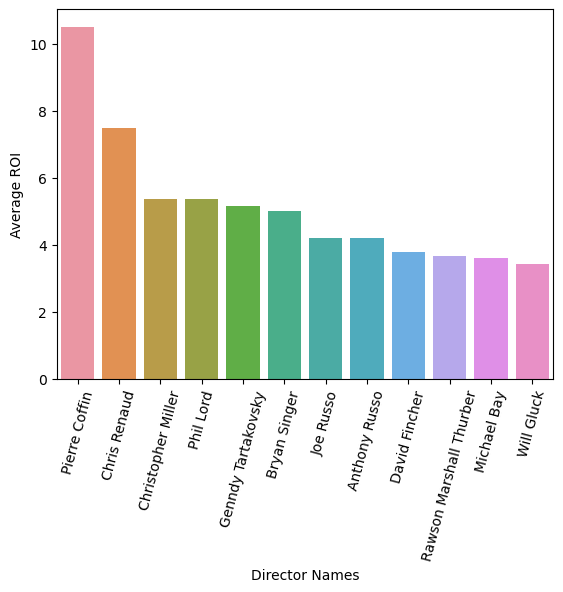

In [297]:
sns.barplot(data=df2.head(12), x='Director Names', y="Average ROI")
plt.xticks(rotation=75)
plt.title('')
plt.show()

# ACTORS

The following cells query the actors with movies that had a $10mil-45mil budget

In [375]:
aq1 = ("""
SELECT person_name, movie, inf_adj_production_budget, ROI
FROM actors
WHERE inf_adj_production_budget BETWEEN 1e7 AND 4.5e7
    --AND Action = 1
ORDER BY ROI
""")

actors_q1 = pysqldf(aq1)

In [376]:
actors_q1

,person_name,movie,inf_adj_production_budget,ROI
0,Sean Patrick Flanery,Broken Horses,18710017,-0.999769
1,Thomas Jane,Broken Horses,18710017,-0.999769
2,Henry Shotwell,Broken Horses,18710017,-0.999769
3,Nicholas Neve,Broken Horses,18710017,-0.999769
4,Christopher Lambert,10 Days in a Madhouse,15006421,-0.998782
...,...,...,...,...
1333,Vincent Cassel,Black Swan,17603698,24.482055
1334,James Jude Courtney,Halloween,11736441,24.490067
1335,Nat Wolff,The Fault in Our Stars,14943019,24.597236
1336,Ansel Elgort,The Fault in Our Stars,14943019,24.597236


In [377]:
#actors who've had between $10mil-45mil budget and than made 3+ movies from 2010-2020

three_movies_aq1 = []
for x, y in zip(actors_q1['person_name'].value_counts(), actors_q1['person_name'].value_counts().index.tolist()):
    if x >= 3:
        three_movies_aq1.append(y)
    
three_movies_aq1

['Robert De Niro',
 'Zac Efron',
 'Forest Whitaker',
 'John Goodman',
 'Channing Tatum',
 'Steve Carell',
 'Jake Gyllenhaal',
 'Michael Fassbender',
 'Kevin Hart',
 'Seth Rogen',
 'Michael Shannon',
 'Ed Helms',
 'Bruce Willis',
 'Sam Rockwell',
 'Colin Farrell',
 'Kevin Costner',
 'Mark Wahlberg',
 'George Clooney',
 'Tom Hardy',
 'Josh Brolin',
 'Ryan Gosling',
 'Jason Statham',
 'Morris Chestnut',
 'Nicolas Cage',
 'John Cusack',
 'Gary Oldman',
 'Liev Schreiber',
 'Brad Pitt',
 'Jon Hamm',
 'Oscar Isaac',
 'Joseph Gordon-Levitt',
 'Mark Strong',
 'Anthony Mackie',
 'Bill Nighy',
 'Casey Affleck',
 'Dennis Quaid',
 'Tom Hanks',
 'Kevin Kline',
 'Richard Jenkins',
 'Michael Peña',
 'Owen Wilson',
 'Daniel Brühl',
 'Chadwick Boseman',
 'Sebastian Stan',
 'Michael Ealy',
 'Tommy Lee Jones',
 'Dwayne Johnson',
 'Jeffrey Dean Morgan',
 'Matthew McConaughey',
 'James Franco',
 'Morgan Freeman',
 'Edward Norton',
 'James Marsden',
 'Dane DeHaan',
 'Johnny Knoxville',
 'Bill Murray',
 'Josh

In [378]:
names_aq1 = []
ROI_aq1 = []
for x in three_movies_aq1:
    ROI_aq1_mean = actors_q1[actors_q1['person_name'] == x]['ROI'].mean()
    names_aq1.append(x)
    ROI_aq1.append(ROI_aq1_mean)

    
zipped_name_ROI_2_aq1 = sorted(zip(names_aq1, ROI_aq1), reverse=True)
df1_aq1 = pd.DataFrame(zipped_name_ROI_2_aq1, columns=['Actor Names', 'Average ROI'])
df1_aq1.sort_values(by='Average ROI', ascending=False, inplace=True)
df1_aq1

,Actor Names,Average ROI
25,Nat Wolff,10.386387
4,Vincent Cassel,8.211520
13,Ryan Gosling,5.984147
21,Patrick Wilson,5.806667
67,Jacob Tremblay,5.385249
...,...,...
63,James Marsden,-0.197698
83,David Thewlis,-0.306800
34,Matthew McConaughey,-0.452724
33,Mel Gibson,-0.545658


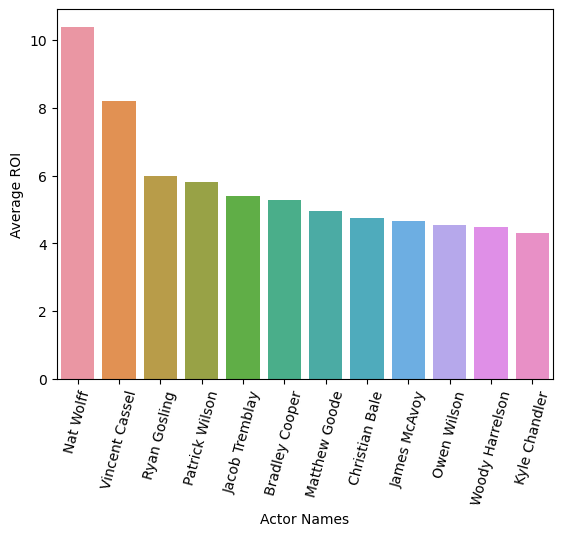

In [379]:
sns.barplot(data=df1_aq1.head(12), x='Actor Names', y="Average ROI")
plt.xticks(rotation=75)
plt.title('')
plt.show()

<b>The following cells query the actors with movies that had a $45million or more budget</b>

In [367]:
aq2 = ("""
SELECT person_name, movie, inf_adj_production_budget, ROI
FROM actors
WHERE inf_adj_production_budget BETWEEN 4.5e7 AND 10e9
    --AND Comedy = 1
ORDER BY ROI
""")

actors_q2 = pysqldf(aq2)

In [368]:
#actors who've had greater than $45 million budget and greater than 3+ movies from 2010-2020


three_movies_aq2 = []
for x, y in zip(actors_q2['person_name'].value_counts(), actors_q2['person_name'].value_counts().index.tolist()):
    if x >= 3:
        three_movies_aq2.append(y)
    
three_movies_aq2

['Johnny Depp',
 'Dwayne Johnson',
 'Mark Wahlberg',
 'Matt Damon',
 'Liam Neeson',
 'Chris Hemsworth',
 'Robert Downey Jr.',
 'Owen Wilson',
 'Kevin James',
 'Jason Statham',
 'Ryan Reynolds',
 'Chris Pine',
 'Will Ferrell',
 'Adam Sandler',
 'Hugh Jackman',
 'Jonah Hill',
 'Channing Tatum',
 'Tom Cruise',
 'Steve Carell',
 'Morgan Freeman',
 'Ben Affleck',
 'Liam Hemsworth',
 'James McAvoy',
 'Matthew McConaughey',
 'Ben Stiller',
 'Vin Diesel',
 'Jamie Foxx',
 'Leonardo DiCaprio',
 'Woody Harrelson',
 'Bradley Cooper',
 'Gerard Butler',
 'Tom Hanks',
 'Sylvester Stallone',
 'Joel Edgerton',
 'Josh Hutcherson',
 'Christoph Waltz',
 'Kevin Hart',
 'Chris Pratt',
 'Tom Hardy',
 'Denzel Washington',
 'Gary Oldman',
 'Michael Fassbender',
 'Nicolas Cage',
 'Anthony Hopkins',
 'Chris Evans',
 'Jason Sudeikis',
 'Josh Brolin',
 'Brad Pitt',
 'Justin Timberlake',
 'Mark Ruffalo',
 'Jack Black',
 'Jesse Eisenberg',
 'Ben Kingsley',
 'Samuel L. Jackson',
 'Ralph Fiennes',
 'Tom Hiddleston',
 

In [369]:
names_aq2 = []
ROI_aq2 = []
for x in three_movies_aq2:
    ROI_aq2_mean = actors_q2[actors_q2['person_name'] == x]['ROI'].mean()
    names_aq2.append(x)
    ROI_aq2.append(ROI_aq2_mean)

    
zipped_name_ROI_2_aq2 = sorted(zip(names_aq2, ROI_aq2), reverse=True)
df2_aq2 = pd.DataFrame(zipped_name_ROI_2_aq2, columns=['Actor Names', 'Average ROI'])
df2_aq2.sort_values(by='Average ROI', ascending=False, inplace=True)
df2_aq2.head(50)
df2_aq2

,Actor Names,Average ROI
100,Jamie Dornan,8.320433
26,Seth MacFarlane,6.591352
73,Josh Gad,6.059847
151,Benjamin Bratt,5.837510
20,T.J. Miller,5.030932
...,...,...
35,Rodrigo Santoro,0.220755
80,John Malkovich,0.214724
116,Harrison Ford,0.177141
84,Joel Kinnaman,0.174722


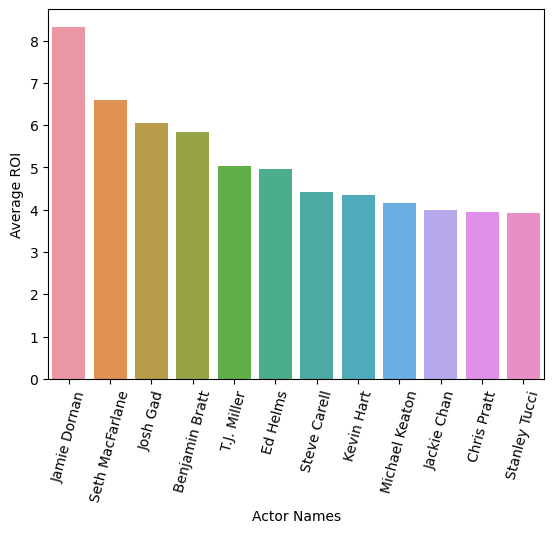

In [370]:
sns.barplot(data=df2_aq2.head(12), x='Actor Names', y="Average ROI")
plt.xticks(rotation=75)
plt.title('')
plt.show()

## ACTRESSES 
    
The following cells query the actresses in the 10-45million budget range</b>

In [380]:
aq3 = ("""
SELECT person_name, movie, inf_adj_production_budget, ROI
FROM actresses
WHERE inf_adj_production_budget BETWEEN 1e7 AND 4.5e7
ORDER BY ROI
""")

actresses_aq3 = pysqldf(aq3)

In [121]:
actresses_aq3

,person_name,movie,inf_adj_production_budget,ROI,Adventure,Action,Comedy,Animation,Drama
0,Kelly LeBrock,10 Days in a Madhouse,15006421,-0.998782,0,0,0,0,1
1,Julia Chantrey,10 Days in a Madhouse,15006421,-0.998782,0,0,0,0,1
2,Caroline Barry,10 Days in a Madhouse,15006421,-0.998782,0,0,0,0,1
3,Mackenzie Davis,Freaks of Nature,41180555,-0.997850,0,0,1,0,0
4,Beverly D'Angelo,Accidental Love,32681495,-0.994791,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
867,Laura Dern,The Fault in Our Stars,14943019,24.597236,0,0,0,0,1
868,Shailene Woodley,The Fault in Our Stars,14943019,24.597236,0,0,0,0,1
869,Fatima Sana Shaikh,Dangal,11678532,30.016276,0,1,0,0,1
870,Sakshi Tanwar,Dangal,11678532,30.016276,0,1,0,0,1


In [381]:
three_movies_aq3 = []
for x, y in zip(actresses_aq3['person_name'].value_counts(), actresses_aq3['person_name'].value_counts().index.tolist()):
    if x >= 3:
        three_movies_aq3.append(y)
    
three_movies_aq3

['Nicole Kidman',
 'Rachel McAdams',
 'Chloë Grace Moretz',
 'Jennifer Garner',
 'Emma Stone',
 'Meryl Streep',
 'Regina Hall',
 'Anna Kendrick',
 'Taraji P. Henson',
 'Melissa McCarthy',
 'Julia Roberts',
 'Diane Keaton',
 'Emily Blunt',
 'Viola Davis',
 'Saoirse Ronan',
 'Amy Adams',
 'Kristen Bell',
 'Toni Collette',
 'Rachel Weisz',
 'Carey Mulligan',
 'Keira Knightley',
 'Helen Mirren',
 'Ari Graynor',
 'Hailee Steinfeld',
 'Katherine Heigl',
 'Jessica Alba',
 'Rosario Dawson',
 'Octavia Spencer',
 'Leighton Meester',
 'Tiffany Haddish',
 'Jodie Foster',
 'Selena Gomez',
 'Vanessa Hudgens',
 'Margot Robbie',
 'Alicia Vikander',
 'Tina Fey',
 'Amanda Seyfried',
 'Alice Eve',
 'Mila Kunis',
 'Reese Witherspoon',
 'Anna Faris',
 'Kate Winslet',
 'Andrea Riseborough',
 'Naomi Watts',
 'Queen Latifah',
 'Amandla Stenberg',
 'Natalie Portman',
 'Brie Larson',
 'Jessica Chastain',
 'Kristen Wiig',
 'Emma Watson',
 'Rebel Wilson',
 'Vera Farmiga',
 'Kate Bosworth',
 'Elisabeth Shue',
 'Si

In [382]:
names_aq3 = []
ROI_aq3 = []
for x in three_movies_aq3:
    ROI_aq3_mean = actresses_aq3[actresses_aq3['person_name'] == x]['ROI'].mean()
    names_aq3.append(x)
    ROI_aq3.append(ROI_aq3_mean)

    
zipped_name_ROI_aq3 = sorted(zip(names_aq3, ROI_aq3), reverse=True)
df1_aq3 = pd.DataFrame(zipped_name_ROI_aq3, columns=['Actress Names', 'Average ROI'])
df1_aq3.sort_values(by='Average ROI', ascending=False, inplace=True)
df1_aq3.head(50)
df1_aq3

,Actress Names,Average ROI
26,Mila Kunis,12.031027
9,Shailene Woodley,11.008944
24,Natalie Portman,10.838856
35,Laura Dern,9.367955
22,Octavia Spencer,8.278741
...,...,...
43,Kate Bosworth,0.057813
39,Kirsten Dunst,-0.069550
46,Jodie Foster,-0.128213
37,Kristen Stewart,-0.442266


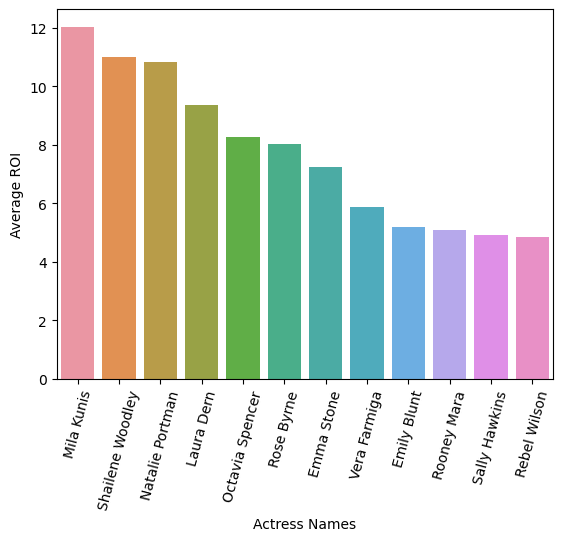

In [383]:
sns.barplot(data=df1_aq3.head(12), x='Actress Names', y="Average ROI")
plt.xticks(rotation=75)
plt.title('')
plt.show()

The following cells queries the actresses that were movies that budgeted 45million or more

In [387]:
aq4 = ("""
SELECT person_name, movie, inf_adj_production_budget, ROI 
FROM actresses
WHERE inf_adj_production_budget BETWEEN 4.5e7 AND 10e9
ORDER BY ROI
""")

actresses_aq4 = pysqldf(aq4)

In [126]:
three_movies_aq4 = []
for x, y in zip(actresses_aq4['person_name'].value_counts(), actresses_aq4['person_name'].value_counts().index.tolist()):
    if x >= 3:
        three_movies_aq4.append(y)
    
three_movies_aq4

['Jennifer Lawrence',
 'Anne Hathaway',
 'Emily Blunt',
 'Amy Adams',
 'Cameron Diaz',
 'Cate Blanchett',
 'Scarlett Johansson',
 'Viola Davis',
 'Emma Stone',
 'Kristen Wiig',
 'Jessica Chastain',
 'Mila Kunis',
 'Charlize Theron',
 'Zoe Saldana',
 'Angelina Jolie',
 'Jennifer Aniston',
 'Anna Kendrick',
 'Bryce Dallas Howard',
 'Helen Mirren',
 'Rosamund Pike',
 'Natalie Portman',
 'Rooney Mara',
 'Jennifer Connelly',
 'Rachel McAdams',
 'Amanda Seyfried',
 'Gwyneth Paltrow',
 'Dakota Johnson',
 'Milla Jovovich',
 'Elle Fanning',
 'Salma Hayek',
 'Anna Faris',
 'Vera Farmiga',
 'Tessa Thompson',
 'Reese Witherspoon',
 'Maya Rudolph',
 'Helena Bonham Carter',
 'Rose Byrne',
 'Alexandra Daddario',
 'Leslie Mann',
 'Eva Green',
 'Rebecca Hall',
 'Chloë Grace Moretz',
 'Brie Larson',
 'Naomi Watts',
 'Olivia Wilde',
 'Katherine Heigl',
 'Keira Knightley',
 'Tina Fey',
 'Michelle Rodriguez',
 'Rosario Dawson',
 'Jennifer Garner',
 'Hailee Steinfeld',
 'Julia Roberts',
 'Jennifer Lopez',
 

In [384]:
names_aq4 = []
ROI_aq4 = []
for x in three_movies_aq4:
    ROI_aq4_mean = actresses_aq4[actresses_aq4['person_name'] == x]['ROI'].mean()
    names_aq4.append(x)
    ROI_aq4.append(ROI_aq4_mean)

    
zipped_name_ROI_aq4 = sorted(zip(names_aq4, ROI_aq4), reverse=True)
df1_aq4 = pd.DataFrame(zipped_name_ROI_aq4, columns=['Actress Names', 'Average ROI'])
df1_aq4.sort_values(by='Average ROI', ascending=False, inplace=True)
df1_aq4.head(50)
df1_aq4

,Actress Names,Average ROI
57,Eloise Mumford,8.320433
8,Sandra Bullock,8.109692
60,Dakota Johnson,6.456541
35,Kristen Wiig,5.191862
6,Selena Gomez,5.143562
...,...,...
45,Jennifer Connelly,0.684633
38,Katherine Heigl,0.640888
36,Keira Knightley,0.640022
53,Emma Thompson,0.410571


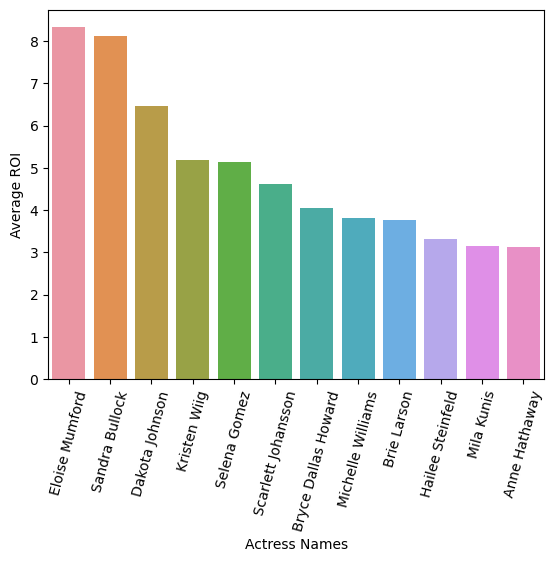

In [385]:
sns.barplot(data=df1_aq4.head(12), x='Actress Names', y="Average ROI")
plt.xticks(rotation=75)
plt.title('')
plt.show()

## WRITERS


In [397]:
wq1 = ("""
SELECT person_name, movie, inf_adj_production_budget, ROI
FROM writers
WHERE inf_adj_production_budget BETWEEN 1e7 AND 4.5e7
ORDER BY ROI
""")

writers_wq1 = pysqldf(wq1)

In [398]:
three_movies_wq1 = []
for x, y in zip(writers_wq1['person_name'].value_counts(), writers_wq1['person_name'].value_counts().index.tolist()):
    if x >= 3:
        three_movies_wq1.append(y)
    
three_movies_wq1

['Nicholas Sparks',
 'Jeff Kinney',
 'Luc Besson',
 'Evan Goldberg',
 'Kenya Barris',
 'Andrew Jay Cohen',
 "Brendan O'Brien",
 'Will Fetters',
 'Stephen King',
 'Michael H. Weber',
 'Scott Neustadter',
 'Allan Loeb',
 'Taylor Sheridan',
 'J. Mills Goodloe']

In [399]:
names_wq1 = []
ROI_wq1 = []
for x in three_movies_wq1:
    ROI_wq1_mean = writers_wq1[writers_wq1['person_name'] == x]['ROI'].mean()
    names_wq1.append(x)
    ROI_wq1.append(ROI_wq1_mean)

    
zipped_name_ROI_wq1 = sorted(zip(names_wq1, ROI_wq1), reverse=True)
df1_wq1 = pd.DataFrame(zipped_name_ROI_wq1, columns=['Writer Names', 'Average ROI'])
df1_wq1.sort_values(by='Average ROI', ascending=False, inplace=True)
df1_wq1.head(50)
df1_wq1

,Writer Names,Average ROI
3,Scott Neustadter,10.863292
5,Michael H. Weber,10.863292
2,Stephen King,8.296232
11,Brendan O'Brien,5.819924
12,Andrew Jay Cohen,5.819924
10,Evan Goldberg,3.214542
8,Jeff Kinney,2.588381
4,Nicholas Sparks,2.499228
9,J. Mills Goodloe,2.346336
0,Will Fetters,1.992065


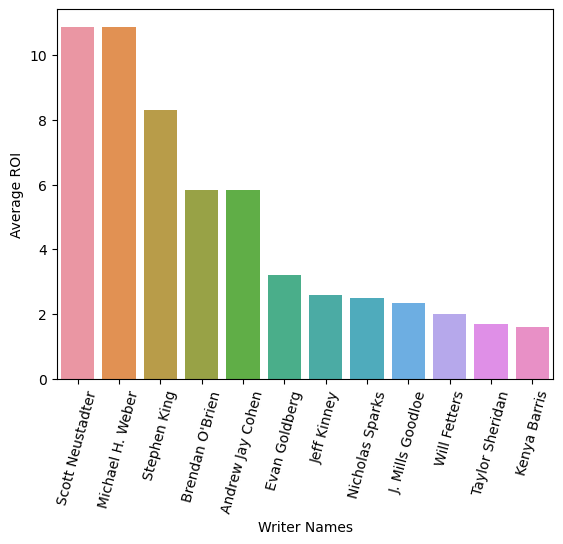

In [400]:
sns.barplot(data=df1_wq1.head(12), x='Writer Names', y="Average ROI")
plt.xticks(rotation=75)
plt.title('')
plt.show()

In [414]:
wq2 = ("""
SELECT person_name, movie, inf_adj_production_budget, ROI
FROM writers
WHERE inf_adj_production_budget BETWEEN 4.5e7 AND 10e9
    AND Action = 1
ORDER BY ROI
""")

writers_wq2 = pysqldf(wq2)

In [415]:
three_movies_wq2 = []
for x, y in zip(writers_wq2['person_name'].value_counts(), writers_wq2['person_name'].value_counts().index.tolist()):
    if x >= 3:
        three_movies_wq2.append(y)
    
three_movies_wq2

['Stan Lee',
 'Jack Kirby',
 'Richard Wenk',
 'Christopher Markus',
 'Jeff Pinkner',
 'Mark Bomback',
 'Amanda Silver',
 'Rick Jaffa',
 'Stephen McFeely',
 'James Vanderbilt',
 'Chris McKenna',
 'Erik Sommers',
 'Evan Daugherty',
 'Simon Kinberg',
 'John Gatins',
 'Dave Callaham',
 'Matt Sazama',
 'Larry Lieber',
 'Chris Morgan',
 'Burk Sharpless',
 'Suzanne Collins',
 'Joe Simon',
 'Jerry Siegel',
 'Gary Whitta',
 'Jane Goldman',
 'Gary Scott Thompson',
 'David S. Goyer',
 'Cressida Cowell',
 'Robert Mark Kamen',
 'Kurt Wimmer',
 'Ted Elliott',
 'Robert Wade',
 'Travis Beacham',
 'Jared Stern',
 'Neal Purvis',
 'Roberto Orci',
 'Damon Lindelof',
 'William Davies',
 'David Koepp',
 'Katrin Benedikt',
 'Jon Spaihts',
 'Christopher McQuarrie',
 'Creighton Rothenberger',
 'Akiva Goldsman',
 'Terry Rossio',
 'Max Borenstein',
 'Ethan Reiff',
 'Phil Hay',
 'Jon Hoeber',
 'Paul Wernick',
 'Matt Manfredi',
 'Rhett Reese',
 'Ehren Kruger',
 'Erich Hoeber',
 'Katie Dippold',
 'Cyrus Voris',
 'D

In [416]:
names_wq2 = []
ROI_wq2 = []
for x in three_movies_wq2:
    ROI_wq2_mean = writers_wq2[writers_wq2['person_name'] == x]['ROI'].mean()
    names_wq2.append(x)
    ROI_wq2.append(ROI_wq2_mean)

    
zipped_name_ROI_wq2 = sorted(zip(names_wq2, ROI_wq2), reverse=True)
df1_wq2 = pd.DataFrame(zipped_name_ROI_wq2, columns=['Writer Names', 'Average ROI'])
df1_wq2.sort_values(by='Average ROI', ascending=False, inplace=True)
df1_wq2.head(50)
df1_wq2

,Writer Names,Average ROI
17,Paul Wernick,6.882097
14,Rhett Reese,6.882097
11,Robert Mark Kamen,5.332492
4,Suzanne Collins,5.328910
44,Derek Connolly,5.127644
56,Chris McKenna,5.105704
41,Erik Sommers,5.105704
38,Gary Scott Thompson,4.991324
32,Jeff Pinkner,4.288281
55,Chris Morgan,3.710231


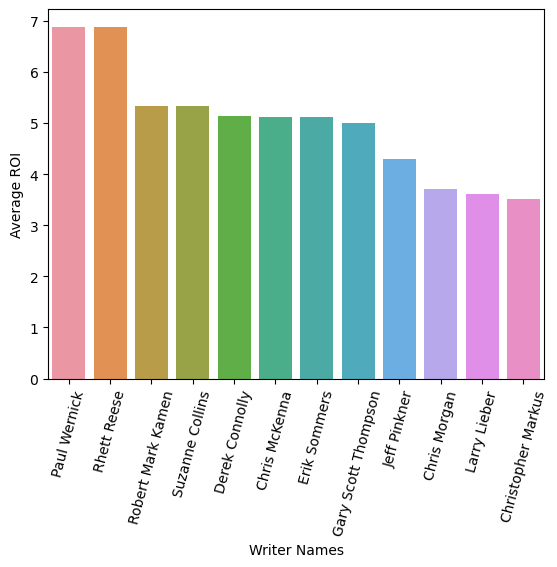

In [417]:
sns.barplot(data=df1_wq2.head(12), x='Writer Names', y="Average ROI")
plt.xticks(rotation=75)
plt.title('')
plt.show()